In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ess_combined = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")


ess_combined.info()
ess_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


#Did people become less trusting from 2012 to 2014?

In [ ]:
ess_2012 = ess_combined[ess_combined['year']==6]

ess_2014 = ess_combined[ess_combined['year']==7]

print(ess_2012.head())
print(ess_2014.head())

  cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
0    CH     5     6      3        3  ...        5       4     2    60        1
1    CH    25     6      6        5  ...        3       2     2    59        1
2    CH    26     6      1        8  ...        6       3     1    24        2
3    CH    28     6      4        6  ...        6       2     2    64        1
4    CH    29     6      5        6  ...        7       2     2    55        1

[5 rows x 13 columns]
    cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
732    CH     5     7      2        8  ...        6       4     1    69        1
733    CH    25     7      4        4  ...        5       3     1    30        1
734    CH    26     7      3        8  ...        7       5     2    49        2
735    CH    28     7      2        7  ...        6       2     1    51        1
736    CH    29     7      2        4  ...        6       2     2    32        2

[5 rows x 13 col

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


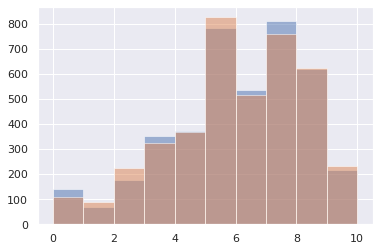

In [ ]:
plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha = .5)

print(stats.shapiro(ess_2012['ppltrst']))
print(stats.shapiro(ess_2014['ppltrst']))

print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))

The data appears normal to follow a normal distribution.

In [ ]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

The p value was not significant, therefore we cannot reject the null hypothesis.

#Did people become happier from 2012 to 2014?

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


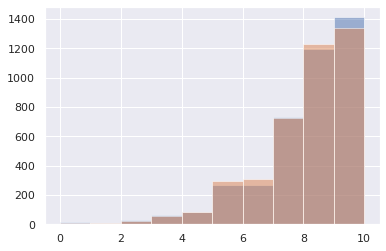

In [ ]:
plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)

print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

The data is not normally distributed, therefore we will use the Kruskall-Wallis test. 

In [ ]:
stats.kruskal(
    ess_2012['happy'],
    ess_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

The p value was not significant, therefore we cannot reject the null hypothesis.

#Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [ ]:
ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ff863a748>,
      dtype=object)

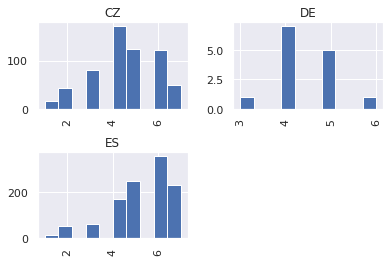

In [ ]:
filter_list = ['CZ', 'DE', 'ES']
ess_2014_cz_de_es = ess_2014[ess_2014['cntry'].isin(filter_list)]

ess_2014_cz_de_es['sclmeet'].hist(by = ess_2014_cz_de_es['cntry'])

Data does not appear to be normal. Will use a Kruskal-Wallis test

In [ ]:
stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

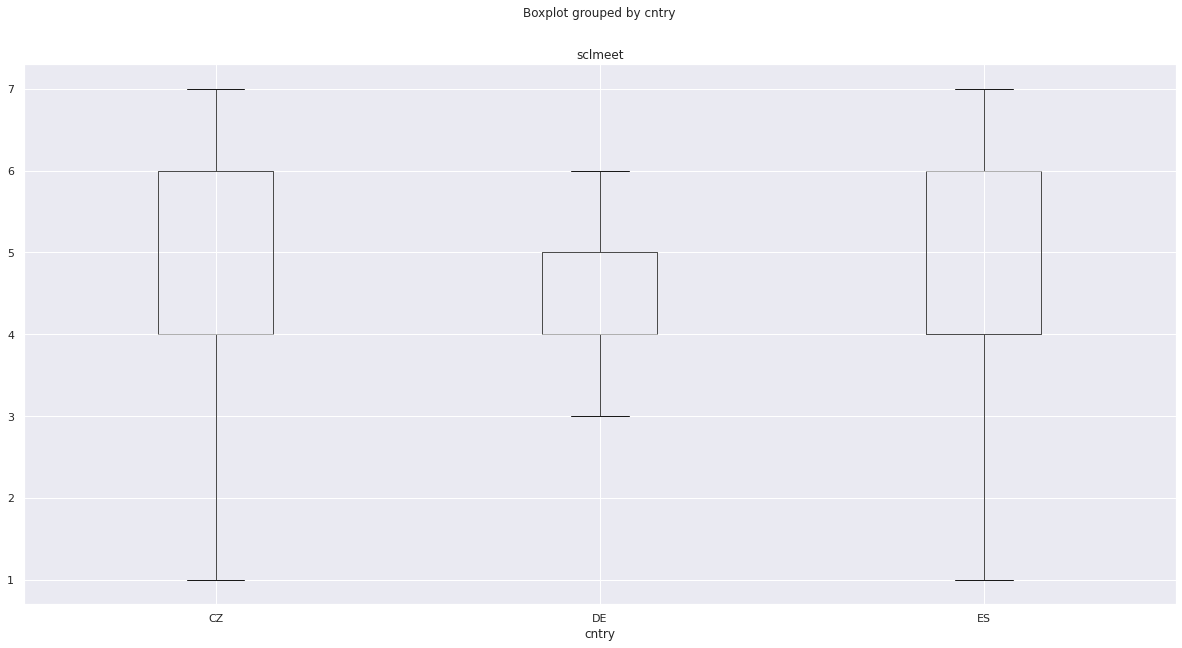

In [ ]:
ess_2014_cz_de_es.boxplot('sclmeet', by='cntry', figsize=(20, 10))

#Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ff866fb70>,
      dtype=object)

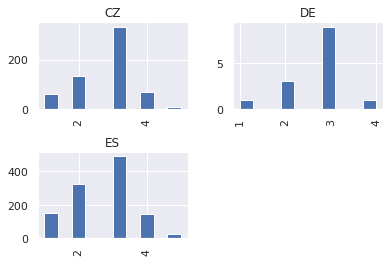

In [ ]:
ess_2014_cz_de_es['sclact'].hist(by = ess_2014_cz_de_es['cntry'])

Data does not appear to be normal. Will use a Kruskal-Wallis test

In [ ]:
stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])

KruskalResult(statistic=6.6483852801485455, pvalue=0.036001573250638776)

The p value is significant, therefore we can reject the null hypothesis. 

# Ruff Figural Fluency Test

In [ ]:
rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


#1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [ ]:
rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


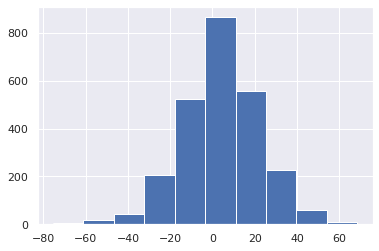

In [ ]:
plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

The distribution appears normal. We can use a test for further analysis.

In [ ]:
stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

The p value is significant, therefore we can reject the null hypothesis.

#Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [ ]:
rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

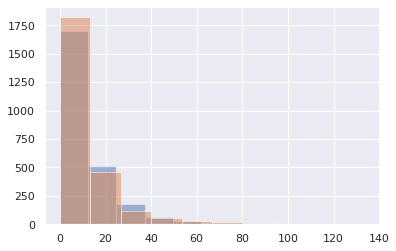

In [ ]:
plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

The distribution is not normal

In [ ]:
stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

The p value is significant, therefore we can reject the null hypothesis.